In [536]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [537]:
warnings.filterwarnings('ignore')

In [538]:
data = pd.read_csv("/content/KOTAKBANK.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
3,2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
4,2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


In [539]:
data.drop(['Date'], axis=1, inplace=True)

In [540]:
print(data.head())
print(data.shape)
print(data.columns)

     Symbol Series  Prev Close   Open    High     Low    Last   Close    VWAP  \
0  KOTAKMAH     EQ      212.35  220.0  229.35  220.00  229.35  229.35  229.13   
1  KOTAKMAH     EQ      229.35  247.7  247.70  225.25  247.70  246.95  244.12   
2  KOTAKMAH     EQ      246.95  229.0  240.00  227.20  228.00  228.40  233.75   
3  KOTAKMAH     EQ      228.40  235.1  239.00  217.00  224.95  225.90  226.84   
4  KOTAKMAH     EQ      225.90  213.0  219.00  207.85  207.85  208.85  209.94   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0    7086  1.623640e+11     NaN                 NaN          NaN  
1   73681  1.798729e+12     NaN                 NaN          NaN  
2  105799  2.473093e+12     NaN                 NaN          NaN  
3   40202  9.119546e+11     NaN                 NaN          NaN  
4   24463  5.135747e+11     NaN                 NaN          NaN  
(4985, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Vol

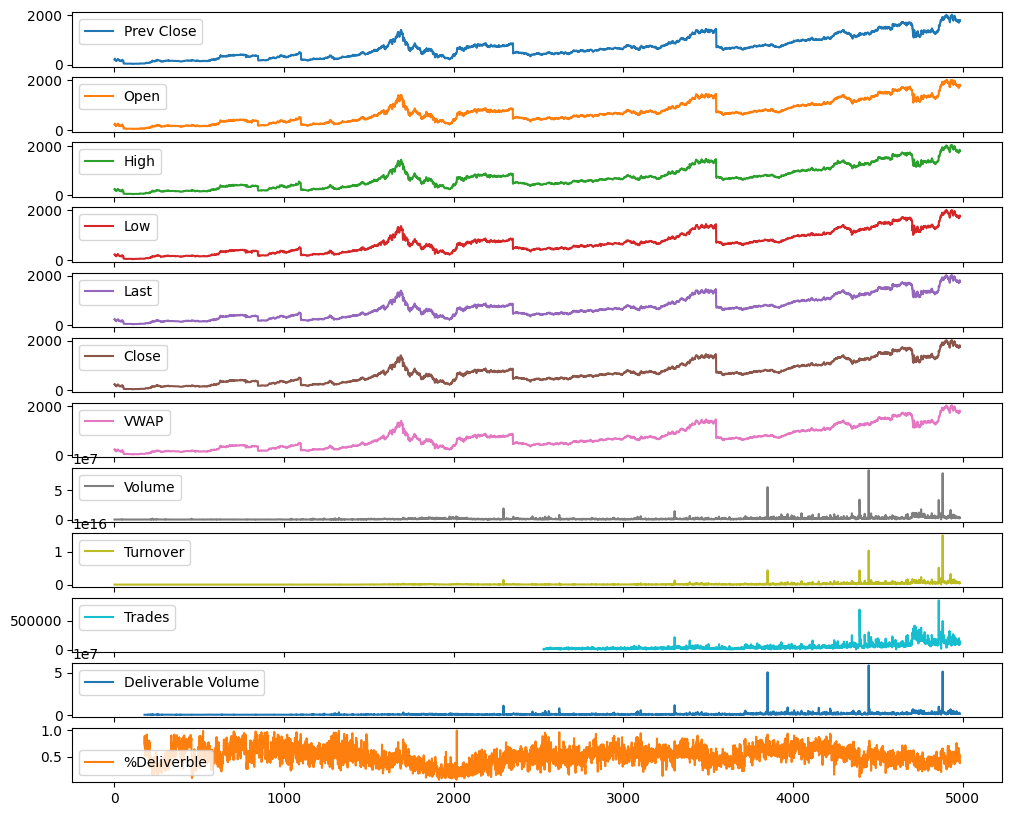

Symbol                   2
Series                   1
Prev Close            4405
Open                  3344
High                  3688
Low                   3838
Last                  3754
Close                 4406
VWAP                  4869
Volume                4975
Turnover              4985
Trades                2425
Deliverable Volume    4776
%Deliverble           3325
dtype: int64

In [541]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [542]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
3,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
4,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


         Symbol Series  Prev Close    Open     High      Low     Last  \
0      KOTAKMAH     EQ      212.35   220.0   229.35   220.00   229.35   
1      KOTAKMAH     EQ      229.35   247.7   247.70   225.25   247.70   
2      KOTAKMAH     EQ      246.95   229.0   240.00   227.20   228.00   
3      KOTAKMAH     EQ      228.40   235.1   239.00   217.00   224.95   
4      KOTAKMAH     EQ      225.90   213.0   219.00   207.85   207.85   
...         ...    ...         ...     ...      ...      ...      ...   
4980  KOTAKBANK     EQ     1734.20  1740.0  1783.00  1733.30  1761.85   
4981  KOTAKBANK     EQ     1759.65  1750.0  1762.60  1724.55  1753.05   
4982  KOTAKBANK     EQ     1750.30  1762.5  1824.00  1754.00  1815.00   
4983  KOTAKBANK     EQ     1811.45  1825.1  1845.45  1780.55  1802.60   
4984  KOTAKBANK     EQ     1805.00  1780.0  1802.00  1739.45  1743.75   

        Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0      229.35   229.13     7086  1.623640e+1

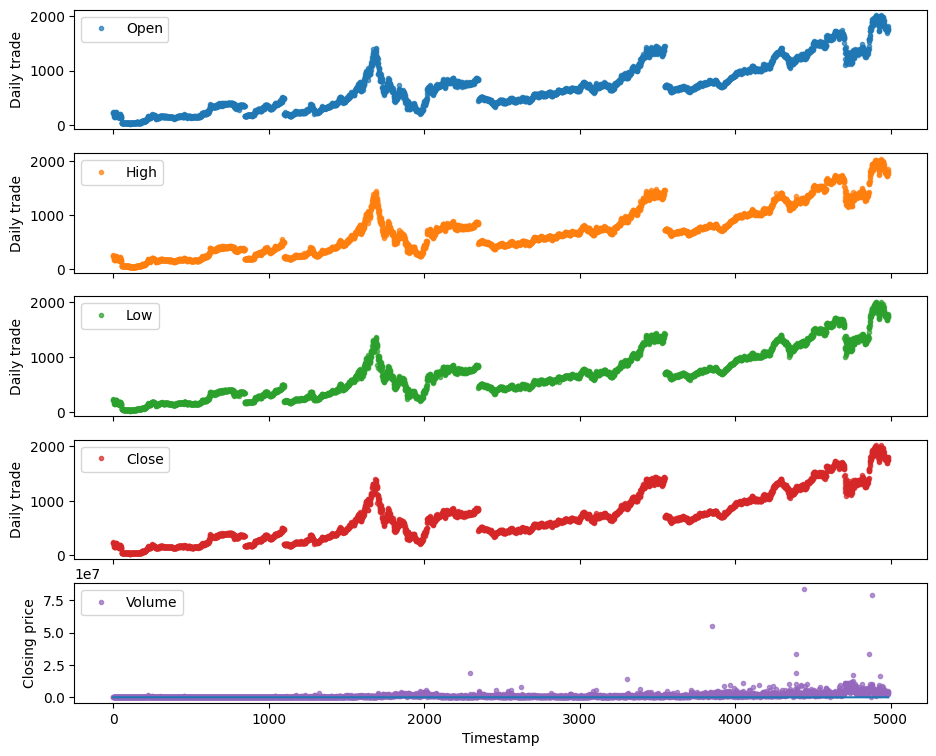

In [543]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [544]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2529
Deliverable Volume     196
%Deliverble            196
dtype: int64

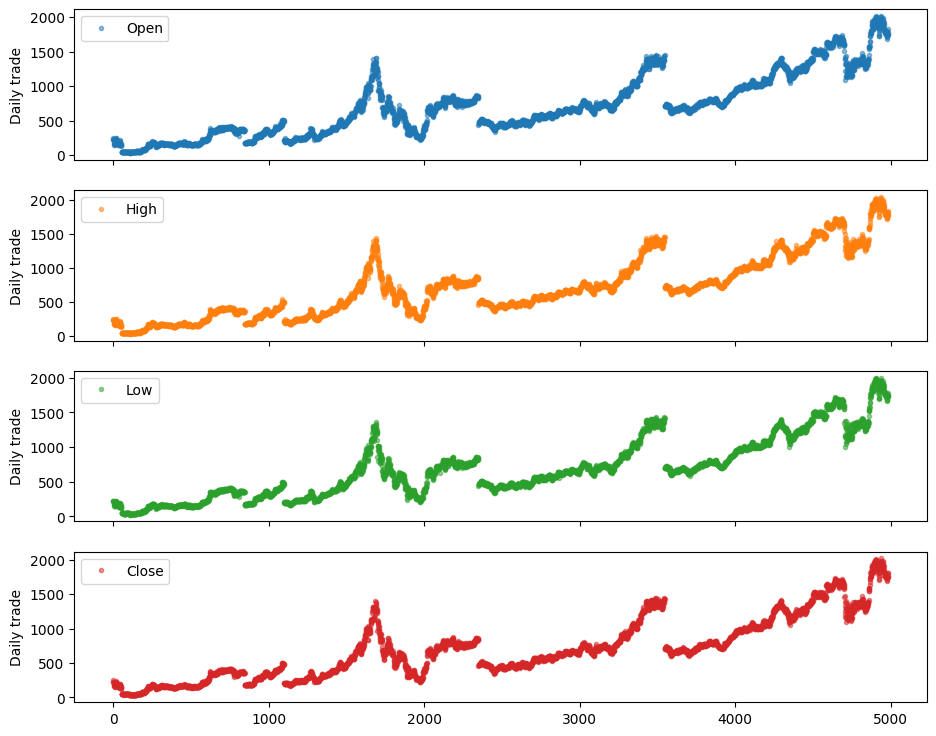

In [545]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

         Symbol Series  Prev Close    Open     High      Low     Last  \
0      KOTAKMAH     EQ      212.35   220.0   229.35   220.00   229.35   
1      KOTAKMAH     EQ      229.35   247.7   247.70   225.25   247.70   
2      KOTAKMAH     EQ      246.95   229.0   240.00   227.20   228.00   
3      KOTAKMAH     EQ      228.40   235.1   239.00   217.00   224.95   
4      KOTAKMAH     EQ      225.90   213.0   219.00   207.85   207.85   
...         ...    ...         ...     ...      ...      ...      ...   
4980  KOTAKBANK     EQ     1734.20  1740.0  1783.00  1733.30  1761.85   
4981  KOTAKBANK     EQ     1759.65  1750.0  1762.60  1724.55  1753.05   
4982  KOTAKBANK     EQ     1750.30  1762.5  1824.00  1754.00  1815.00   
4983  KOTAKBANK     EQ     1811.45  1825.1  1845.45  1780.55  1802.60   
4984  KOTAKBANK     EQ     1805.00  1780.0  1802.00  1739.45  1743.75   

        Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0      229.35   229.13     7086  1.623640e+1

,count,mean,std,min,25%,50%,75%,max
Prev Close,4985.0,6.962918e+02,4.407610e+02,2.730000e+01,3.551500e+02,6.509500e+02,9.664000e+02,2.019650e+03
Open,4985.0,6.971549e+02,4.410374e+02,2.695000e+01,3.550000e+02,6.526500e+02,9.670000e+02,2.016700e+03
High,4985.0,7.081475e+02,4.455584e+02,3.000000e+01,3.669000e+02,6.620000e+02,9.796000e+02,2.049000e+03
Low,4985.0,6.849841e+02,4.355793e+02,2.600000e+01,3.466500e+02,6.384500e+02,9.552500e+02,1.999000e+03
Last,4985.0,6.965564e+02,4.409245e+02,2.650000e+01,3.560000e+02,6.505000e+02,9.680000e+02,2.023900e+03
Close,4985.0,6.966151e+02,4.409387e+02,2.730000e+01,3.556000e+02,6.512000e+02,9.668500e+02,2.019650e+03
VWAP,4985.0,6.967721e+02,4.405808e+02,2.767000e+01,3.551800e+02,6.513900e+02,9.662700e+02,2.028690e+03
Volume,4985.0,1.283626e+06,2.486726e+06,1.050000e+02,1.855800e+05,7.506900e+05,1.577817e+06,8.385990e+07
Turnover,4985.0,1.355506e+14,3.589591e+14,4.608250e+08,5.388055e+12,5.000255e+13,1.243851e+14,1.498222e+16
Trades,2456.0,5.491274e+04,6.040134e+04,3.750000e+02,1.964650e+04,3.376450e+04,6.680250e+04,8.467050e+05


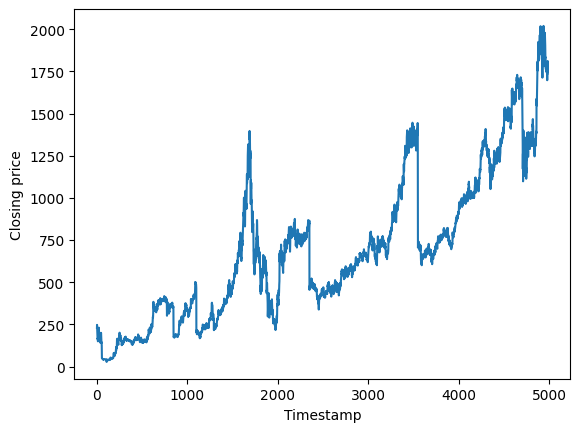

In [546]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [547]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3906
977


In [548]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
62/62 [==============================] - 4s 14ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.1575 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0704
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0570 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0493
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0507 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0452
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0476 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0441
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0459 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0436
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0443 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0439
Epoch 7/100
62/62 [==

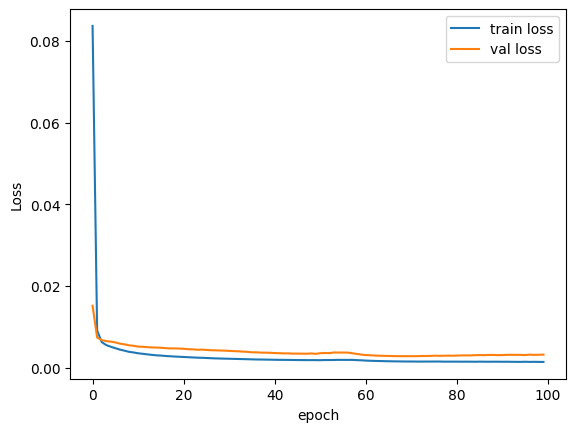

In [549]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

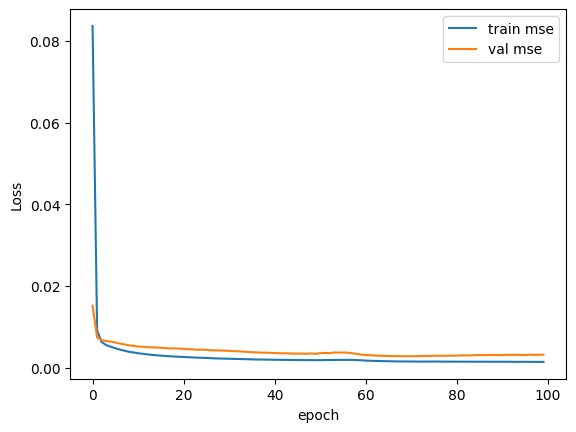

In [550]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

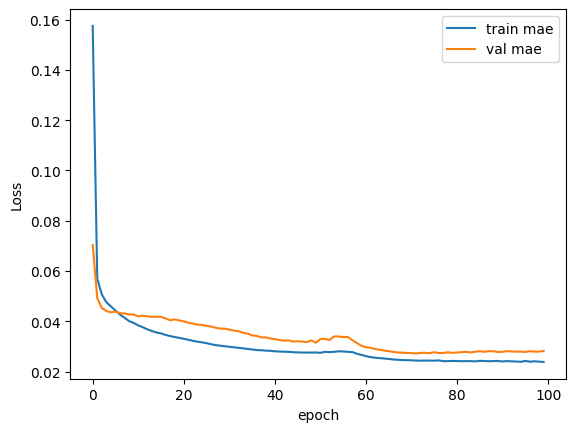

In [551]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_41 (LSTM)              (None, 32)                6272      
                                                                 
 dense_100 (Dense)           (None, 64)                2112      
                                                                 
 dense_101 (Dense)           (None, 64)                4160      
                                                                 
 activation_60 (Activation)  (None, 64)                0         
                                                                 
 dense_102 (Dense)           (None, 64)                4160      
                                                                 
 activation_61 (Activation)  (None, 64)              

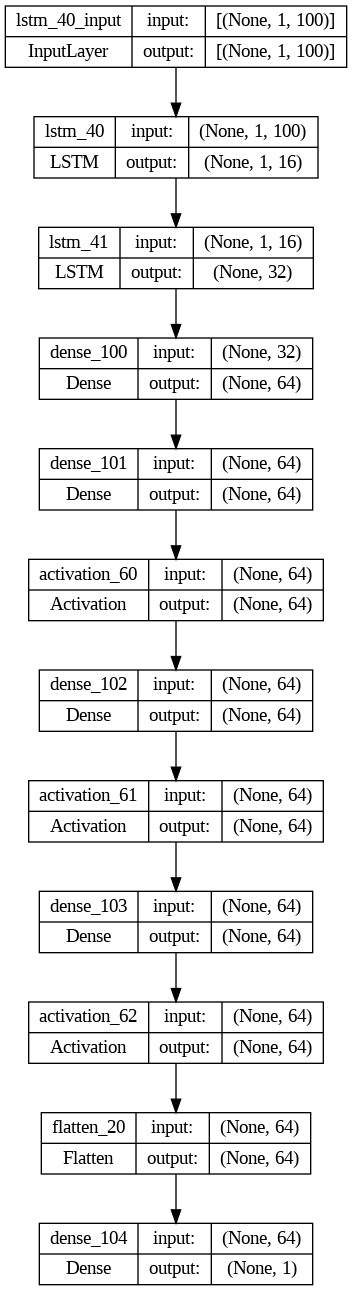

In [552]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [553]:
model.evaluate(test_X, test_Y)

31/31 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0282    


[0.003206411609426141, 0.003206411609426141, 0.028165774419903755]

In [554]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.988203
R2 Score: 0.988097
Max Error: 0.671204


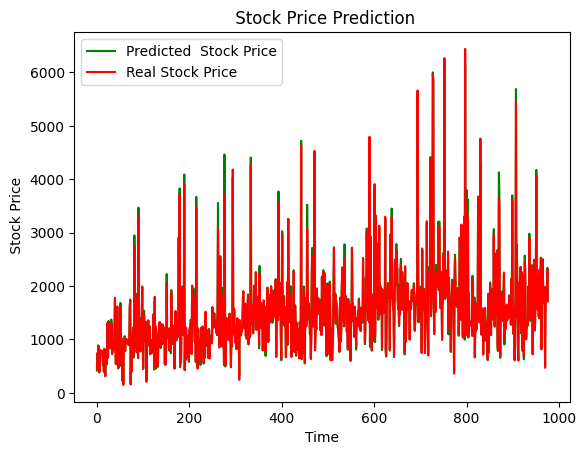

In [556]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [557]:
predicted

array([[ 418.0153 ],
       [ 741.8454 ],
       [ 616.9488 ],
       [ 888.6964 ],
       [ 723.49225],
       [ 378.49622],
       [ 434.82544],
       [ 729.9967 ],
       [ 786.0314 ],
       [ 719.54626],
       [ 757.026  ],
       [ 743.49054],
       [ 725.08997],
       [ 517.78796],
       [ 786.80206],
       [ 396.69168],
       [ 824.4955 ],
       [ 748.83795],
       [ 315.53003],
       [ 765.58966],
       [ 760.29535],
       [ 532.98755],
       [ 694.1353 ],
       [1301.94   ],
       [ 656.5856 ],
       [1346.158  ],
       [ 864.562  ],
       [1041.8594 ],
       [ 935.77905],
       [ 835.1742 ],
       [ 956.92163],
       [1372.2301 ],
       [1238.9469 ],
       [ 753.17065],
       [ 908.26447],
       [ 853.7616 ],
       [ 800.8925 ],
       [ 803.4802 ],
       [1185.5107 ],
       [1763.4458 ],
       [ 865.0008 ],
       [ 541.04224],
       [1064.868  ],
       [ 859.6409 ],
       [1595.1632 ],
       [1178.6366 ],
       [ 460.3194 ],
       [ 600.

In [558]:
test_label

array([[ 460.96164782],
       [ 742.88645756],
       [ 625.95521503],
       [ 868.78183062],
       [ 726.74392624],
       [ 387.84161058],
       [ 411.87235513],
       [ 723.4858742 ],
       [ 801.78320611],
       [ 725.40384727],
       [ 764.49176258],
       [ 742.76087835],
       [ 735.62003124],
       [ 556.13192666],
       [ 790.87616027],
       [ 394.68217718],
       [ 815.18326063],
       [ 738.79172853],
       [ 310.37396362],
       [ 783.15250167],
       [ 764.23097991],
       [ 558.93206951],
       [ 678.69004621],
       [1313.73574255],
       [ 661.39585686],
       [1309.88982162],
       [ 868.59424249],
       [1042.30680132],
       [ 938.07771498],
       [ 831.99494003],
       [ 955.59849547],
       [1308.91291122],
       [1255.00274574],
       [ 724.92886226],
       [ 951.96046512],
       [ 853.62585898],
       [ 793.98409627],
       [ 799.94147247],
       [1188.3759349 ],
       [1779.02027833],
       [ 870.38014784],
       [ 534.526

In [559]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      460.961648       418.015289
1      742.886458       741.845398
2      625.955215       616.948792
3      868.781831       888.696411
4      726.743926       723.492249
..            ...              ...
972   1965.026715      1955.121704
973   1839.993599      1865.378540
974   1950.915789      1971.483398
975   2315.338637      2338.742920
976   1713.434163      1749.784424

[977 rows x 2 columns]


In [560]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 460.9616478234379  | 418.0152893066406  |
|  1  | 742.8864575570761  | 741.8453979492188  |
|  2  | 625.9552150334216  | 616.9487915039062  |
|  3  | 868.7818306180823  | 888.6964111328125  |
|  4  | 726.7439262419695  | 723.4922485351562  |
|  5  | 387.84161057546544 | 378.4962158203125  |
|  6  | 411.87235512565854 |  434.825439453125  |
|  7  | 723.4858741965769  | 729.9967041015625  |
|  8  | 801.7832061068701  | 786.0313720703125  |
|  9  |  725.403847267463  | 719.5462646484375  |
| 10  |  764.49176258181   | 757.0260009765625  |
| 11  | 742.7608783496386  | 743.4905395507812  |
| 12  | 735.6200312445756  | 725.0899658203125  |
| 13  | 556.1319266618868  | 517.7879638671875  |
| 14  | 790.8761602671119  | 786.8020629882812  |
| 15  | 394.6821771814635  | 396.6916809082031  |
| 16  | 815.1832606324973  | 824.4954833984375  |


In [561]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_41 (LSTM)              (None, 32)                6272      
                                                                 
 dense_100 (Dense)           (None, 64)                2112      
                                                                 
 dense_101 (Dense)           (None, 64)                4160      
                                                                 
 activation_60 (Activation)  (None, 64)                0         
                                                                 
 dense_102 (Dense)           (None, 64)                4160      
                                                                 
 activation_61 (Activation)  (None, 64)              

In [562]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))